In [1]:
#pip install opencv-python

In [2]:
#importing the libraries
#To note the time
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os, argparse
import pickle
import cv2
import PIL
import zipfile
import tqdm
import tensorflow as tf
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json
from keras.optimizers import SGD
from keras import backend as K
import keras
%reload_ext tensorboard
import warnings
warnings.filterwarnings('ignore')

In [3]:
a = dt.datetime.now().replace(microsecond = 0)
print("The date and time: ",a)

The date and time:  2022-06-26 19:22:28


In [4]:
img = image.load_img("/Users/Pratyusha/OneDrive/Desktop/Summer22-Hw #04-BirdsDataset/Train/FLAME TANAGER/021.jpg")

In [5]:
cv2.imread("/Users/Pratyusha/OneDrive/Desktop/Summer22-Hw #04-BirdsDataset/Train/FLAME TANAGER/027.jpg").shape

(224, 224, 3)

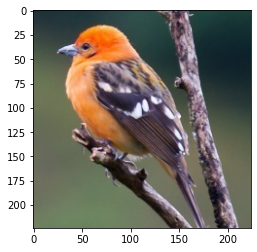

In [6]:
#To check if the path is read
plt.imshow(img)

In [7]:
#Rescaling the train and validation images to 0-1
train = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)
trn_root_dir = '/Users/Pratyusha/OneDrive/Desktop/Summer22-Hw #04-BirdsDataset/Train'
trn_dirs = [os.path.join(trn_root_dir, bird_name)
            for bird_name in os.listdir(trn_root_dir)]
trn_fnames = [os.listdir(bird_dir) for bird_dir in trn_dirs]

vldn_root_dir = '/Users/Pratyusha/OneDrive/Desktop/Summer22-Hw #04-BirdsDataset/Test'
vldn_dirs = [os.path.join(vldn_root_dir, bird_name)
             for bird_name in os.listdir(vldn_root_dir)]
vldn_fnames = [os.listdir(bird_dir) for bird_dir in vldn_dirs]

In [8]:
#Defining train and validation datasets
train_d = train.flow_from_directory('/Users/Pratyusha/OneDrive/Desktop/Summer22-Hw #04-BirdsDataset/Train', target_size=(200,200))
test_d = test.flow_from_directory('/Users/Pratyusha/OneDrive/Desktop/Summer22-Hw #04-BirdsDataset/Test', target_size=(200,200))

Found 1160 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [9]:
#Printing the validation dataset classes
train_d.class_indices

{'FLAME TANAGER': 0,
 'GOULDIAN FINCH': 1,
 'INDIGO BUNTING': 2,
 'LILAC ROLLER': 3,
 'MALACHITE KINGFISHER': 4,
 'NICOBAR PIGEON': 5,
 'PAINTED BUNTIG': 6,
 'PEACOCK': 7,
 'RAINBOW LORIKEET': 8,
 'TAIWAN MAGPIE': 9}

In [10]:
test_d.class_indices

{'FLAMETANAGER': 0,
 'GOULDIAN FINCH': 1,
 'INDIGO BUNTING': 2,
 'LILAC ROLLER': 3,
 'MALACHITE KINGFISHER': 4,
 'NICOBAR PIGEON': 5,
 'PAINTED BUNTIG': 6,
 'PEACOCK': 7,
 'RAINBOW LORIKEET': 8,
 'TAIWAN MAGPIE': 9}

In [11]:
#defining the sequential model
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape =(200,200,3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(256,(3,3),activation = 'relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dropout(0.4),
                             tf.keras.layers.Dense(512,activation = 'relu'),
                             tf.keras.layers.Dense(10,activation = 'softmax')
])
#path for saving logs
path = "logs/fit/"+dt.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = path,histogram_freq=1)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [13]:
#compiling the model using optimizer Adam
model.compile(optimizer = Adam(learning_rate=0.001),
 loss = 'categorical_crossentropy',
 metrics = ['acc'])

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)

In [14]:
history = model.fit(train_d, epochs = 5, validation_data = test_d , callbacks = [tensorboard_callback])

Epoch 1/5
37/37 [==============================] - 18s 459ms/step - loss: 2.2731 - acc: 0.1302 - val_loss: 2.0799 - val_acc: 0.2900
Epoch 2/5
37/37 [==============================] - 16s 438ms/step - loss: 1.8104 - acc: 0.3586 - val_loss: 1.5526 - val_acc: 0.4800
Epoch 3/5
37/37 [==============================] - 17s 447ms/step - loss: 1.2482 - acc: 0.5759 - val_loss: 1.1049 - val_acc: 0.6500
Epoch 4/5
37/37 [==============================] - 16s 432ms/step - loss: 0.8598 - acc: 0.7121 - val_loss: 0.8438 - val_acc: 0.7350
Epoch 5/5
37/37 [==============================] - 16s 444ms/step - loss: 0.7273 - acc: 0.7569 - val_loss: 0.7526 - val_acc: 0.7250


In [15]:
def tt():
    for i in range(10):
        if pred [0][i] == 1:
            break
            print("Model Predicted class is",i)
    if i == 0:
        print("Class is FLAME TANAGER")
    elif i == 1:
        print("Class is GOULDIAN FINCH")
    elif i == 2:
        print("Class is INDIGO BUNTING")      
    elif i == 3:
        print("Class is LILAC ROLLER")
    elif i == 4:
        print("Class is MALACHITE KINGFISHER")
    elif i == 5:
        print("Class is NICOBAR PIGEON")
    elif i == 6:
        print("Class is PAINTED BUNTIG")
    elif i == 7:
        print("Class is PEACOCK")
    elif i == 8:
        print("Class is RAINBOW LORIKEET")
    elif i == 9:
        print("Class is TAIWAN MAGPIE")
    print("***********************************************************************************************************")

Testing the data from the path taken : /Users/Pratyusha/OneDrive/Desktop/Summer22-Hw #04-BirdsDataset/Test
Name of the test bird FLAMETANAGER


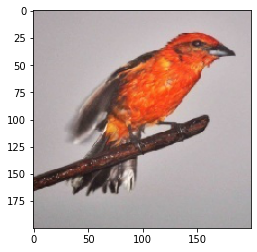

1/1 [==============================] - 0s 124ms/step
Array is : [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Class is FLAME TANAGER
***********************************************************************************************************
Name of the test bird GOULDIAN FINCH


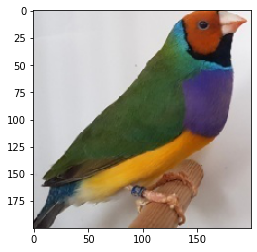

1/1 [==============================] - 0s 23ms/step
Array is : [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Class is GOULDIAN FINCH
***********************************************************************************************************
Name of the test bird INDIGO BUNTING


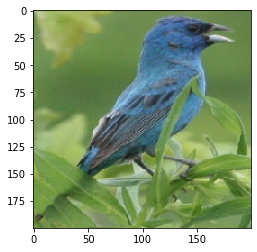

1/1 [==============================] - 0s 22ms/step
Array is : [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Class is INDIGO BUNTING
***********************************************************************************************************
Name of the test bird LILAC ROLLER


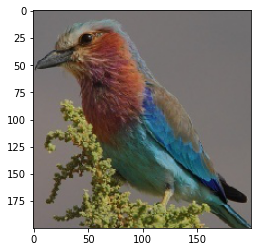

1/1 [==============================] - 0s 22ms/step
Array is : [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Class is LILAC ROLLER
***********************************************************************************************************
Name of the test bird MALACHITE KINGFISHER


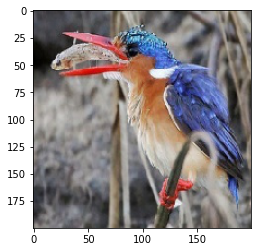

1/1 [==============================] - 0s 25ms/step
Array is : [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Class is MALACHITE KINGFISHER
***********************************************************************************************************
Name of the test bird NICOBAR PIGEON


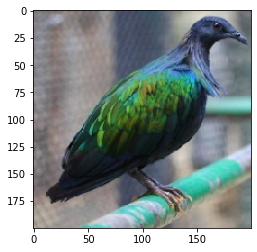

1/1 [==============================] - 0s 26ms/step
Array is : [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Class is NICOBAR PIGEON
***********************************************************************************************************
Name of the test bird PAINTED BUNTIG


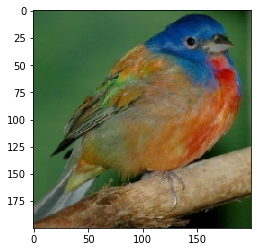

1/1 [==============================] - 0s 23ms/step
Array is : [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Class is PAINTED BUNTIG
***********************************************************************************************************
Name of the test bird PEACOCK


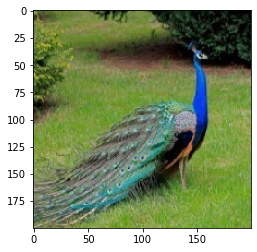

1/1 [==============================] - 0s 21ms/step
Array is : [[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 6.3680736e-12]]
Class is PEACOCK
***********************************************************************************************************
Name of the test bird RAINBOW LORIKEET


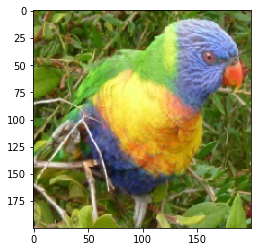

1/1 [==============================] - 0s 23ms/step
Array is : [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Class is RAINBOW LORIKEET
***********************************************************************************************************
Name of the test bird TAIWAN MAGPIE


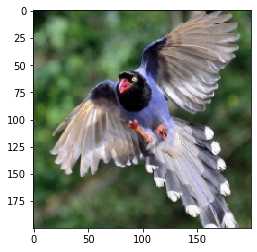

1/1 [==============================] - 0s 31ms/step
Array is : [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Class is TAIWAN MAGPIE
***********************************************************************************************************


In [16]:
#Prindicting the model
pred_dir_path = "/Users/Pratyusha/OneDrive/Desktop/Summer22-Hw #04-BirdsDataset/Test"
print("Testing the data from the path taken :",pred_dir_path)
for j in os.listdir(pred_dir_path):
    if j.startswith('.'):
        continue
    print("Name of the test bird",j)
    img = image.load_img(pred_dir_path + '/' +j + '/001.jpg', target_size = (200,200))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis = 0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size = 10)
    print("Array is :", pred)
    tt()

Text(0.5, 1.0, 'Training and validation loss')

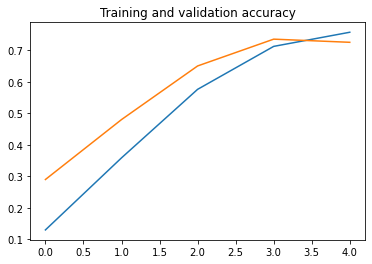

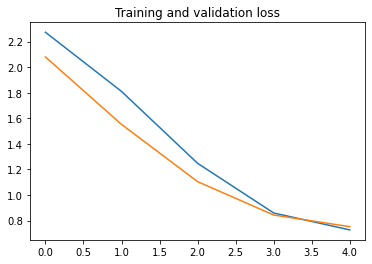

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))  # Get number of epochs

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [18]:
from tensorflow.keras.preprocessing import image

test_imgs = [
    '/Users/Pratyusha/OneDrive/Desktop/Summer22-Hw #04-BirdsDataset/Test/TAIWAN MAGPIE/001.jpg',
    '/Users/Pratyusha/OneDrive/Desktop/Summer22-Hw #04-BirdsDataset/Test/PEACOCK/002.jpg',
    '/Users/Pratyusha/OneDrive/Desktop/Summer22-Hw #04-BirdsDataset/Test/NICOBAR PIGEON/002.jpg'
]

imgs = [np.expand_dims(
            image.img_to_array(
                image.load_img(img, target_size=(200, 200))
            ), axis=0) 
        for img in test_imgs]

# pass the list of multiple images np.vstack()
images = np.vstack(imgs)
classes = model.predict(images, batch_size=10)

# print the classes, the images belong to
all_classes = os.listdir(trn_root_dir)

class_names = [all_classes[int(np.where(np.isclose(predicted_class, 1))[0])]
               for predicted_class in classes]
print(class_names)
print(classes)

1/1 [==============================] - 0s 26ms/step
['TAIWAN MAGPIE', 'LILAC ROLLER', 'TAIWAN MAGPIE']
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [19]:
df = pd.DataFrame(columns=['img_names', 'labels', 'class_names'])

for i in range(len(trn_fnames)):
    class_name = all_classes[i]
    # print(class_name)
    for img_name in trn_fnames[i]:
        df = df.append({'img_names': os.path.join(trn_dirs[i], img_name), 'labels': i, 'class_names': class_name}, ignore_index=True)

df.to_csv('annotations.csv')

In [20]:
bird_d = test.flow_from_directory('/Users/Pratyusha/OneDrive/Desktop/Summer22-Hw #04-BirdsDataset/test-birds', target_size=(200,200),class_mode = 'categorical')

Found 1 images belonging to 1 classes.


In [21]:
model_reduced = tf.keras.models.Sequential()
for layer in model.layers[:-1]:
    model_reduced.add(layer)

data = pd.read_csv('annotations.csv', usecols=['img_names', 'labels', 'class_names'])

def get_image_features(img_file):
    image = load_img(img_file, target_size=(200, 200))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    features = model_reduced.predict(image)

    return features

img_feature_list = []

for img in tqdm.tqdm(data.img_names):
    img_features = get_image_features(img)
    img_feature_list.append(img_features)

img_features_arr = np.asarray(img_feature_list)
del img_feature_list
img_features_arr = np.rollaxis(img_features_arr, 1, 0)
img_features_arr = img_features_arr[0, :, :]
pickle.dump(img_features_arr, open('features.pkl', 'wb'))

  0%|                                                                                      | 0/1160 [00:00<?, ?it/s]

1/1 [==============================] - 0s 76ms/step


  0%|                                                                              | 1/1160 [00:00<01:59,  9.66it/s]

1/1 [==============================] - 0s 26ms/step


  0%|▏                                                                             | 3/1160 [00:00<01:13, 15.66it/s]

1/1 [==============================] - 0s 24ms/step


  0%|▎                                                                             | 5/1160 [00:00<01:05, 17.54it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▌                                                                             | 8/1160 [00:00<01:01, 18.75it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▋                                                                            | 10/1160 [00:00<01:01, 18.79it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▊                                                                            | 12/1160 [00:00<01:01, 18.59it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▉                                                                            | 14/1160 [00:00<01:00, 18.84it/s]

1/1 [==============================] - 0s 22ms/step


  1%|█                                                                            | 16/1160 [00:00<01:00, 18.90it/s]

1/1 [==============================] - 0s 28ms/step


  2%|█▏                                                                           | 18/1160 [00:00<01:00, 18.89it/s]

1/1 [==============================] - 0s 24ms/step


  2%|█▎                                                                           | 20/1160 [00:01<00:59, 19.10it/s]

1/1 [==============================] - 0s 24ms/step


  2%|█▍                                                                           | 22/1160 [00:01<00:59, 18.97it/s]

1/1 [==============================] - 0s 29ms/step


  2%|█▌                                                                           | 24/1160 [00:01<01:03, 17.85it/s]

1/1 [==============================] - 0s 27ms/step


  2%|█▋                                                                           | 26/1160 [00:01<01:03, 17.75it/s]

1/1 [==============================] - 0s 25ms/step


  2%|█▊                                                                           | 28/1160 [00:01<01:02, 18.12it/s]

1/1 [==============================] - 0s 29ms/step


  3%|█▉                                                                           | 30/1160 [00:01<01:02, 18.04it/s]

1/1 [==============================] - 0s 25ms/step


  3%|██                                                                           | 32/1160 [00:01<01:02, 17.91it/s]

1/1 [==============================] - 0s 24ms/step


  3%|██▎                                                                          | 34/1160 [00:01<01:02, 18.14it/s]

1/1 [==============================] - 0s 22ms/step


  3%|██▍                                                                          | 36/1160 [00:01<01:01, 18.40it/s]

1/1 [==============================] - 0s 26ms/step


  3%|██▌                                                                          | 38/1160 [00:02<01:00, 18.69it/s]

1/1 [==============================] - 0s 26ms/step


  3%|██▋                                                                          | 40/1160 [00:02<01:00, 18.64it/s]

1/1 [==============================] - 0s 26ms/step


  4%|██▊                                                                          | 42/1160 [00:02<01:00, 18.40it/s]

1/1 [==============================] - 0s 24ms/step


  4%|██▉                                                                          | 44/1160 [00:02<00:59, 18.74it/s]

1/1 [==============================] - 0s 22ms/step


  4%|███                                                                          | 46/1160 [00:02<00:58, 19.05it/s]

1/1 [==============================] - 0s 23ms/step


  4%|███▏                                                                         | 48/1160 [00:02<00:57, 19.27it/s]

1/1 [==============================] - 0s 25ms/step


  4%|███▎                                                                         | 50/1160 [00:02<00:57, 19.17it/s]

1/1 [==============================] - 0s 23ms/step


  4%|███▍                                                                         | 52/1160 [00:02<00:58, 18.89it/s]

1/1 [==============================] - 0s 28ms/step


  5%|███▌                                                                         | 54/1160 [00:02<00:59, 18.52it/s]

1/1 [==============================] - 0s 26ms/step


  5%|███▋                                                                         | 56/1160 [00:03<01:02, 17.59it/s]

1/1 [==============================] - 0s 27ms/step


  5%|███▊                                                                         | 58/1160 [00:03<01:03, 17.34it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███▉                                                                         | 60/1160 [00:03<01:02, 17.55it/s]

1/1 [==============================] - 0s 26ms/step


  5%|████                                                                         | 62/1160 [00:03<01:02, 17.69it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▏                                                                        | 64/1160 [00:03<00:59, 18.32it/s]

1/1 [==============================] - 0s 26ms/step


  6%|████▍                                                                        | 67/1160 [00:03<00:57, 18.85it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▌                                                                        | 69/1160 [00:03<00:57, 19.03it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▋                                                                        | 71/1160 [00:03<00:57, 18.96it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▊                                                                        | 73/1160 [00:03<00:58, 18.68it/s]

1/1 [==============================] - 0s 22ms/step


  7%|█████                                                                        | 76/1160 [00:04<00:56, 19.21it/s]

1/1 [==============================] - 0s 22ms/step


  7%|█████▏                                                                       | 78/1160 [00:04<00:56, 19.30it/s]

1/1 [==============================] - 0s 24ms/step


  7%|█████▎                                                                       | 80/1160 [00:04<00:56, 19.23it/s]

1/1 [==============================] - 0s 24ms/step


  7%|█████▍                                                                       | 82/1160 [00:04<00:56, 19.17it/s]

1/1 [==============================] - 0s 23ms/step


  7%|█████▌                                                                       | 84/1160 [00:04<00:56, 18.94it/s]

1/1 [==============================] - 0s 23ms/step


  7%|█████▋                                                                       | 86/1160 [00:04<00:56, 19.13it/s]

1/1 [==============================] - 0s 24ms/step


  8%|█████▊                                                                       | 88/1160 [00:04<00:55, 19.32it/s]

1/1 [==============================] - 0s 24ms/step


  8%|██████                                                                       | 91/1160 [00:04<00:54, 19.67it/s]

1/1 [==============================] - 0s 25ms/step


  8%|██████▏                                                                      | 93/1160 [00:05<00:55, 19.40it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████▎                                                                      | 96/1160 [00:05<00:53, 19.85it/s]

1/1 [==============================] - 0s 25ms/step


  9%|██████▌                                                                      | 99/1160 [00:05<00:53, 19.94it/s]

1/1 [==============================] - 0s 21ms/step


  9%|██████▋                                                                     | 102/1160 [00:05<00:52, 20.09it/s]

1/1 [==============================] - 0s 23ms/step


  9%|██████▉                                                                     | 105/1160 [00:05<00:53, 19.90it/s]

1/1 [==============================] - 0s 23ms/step


  9%|███████                                                                     | 108/1160 [00:05<00:52, 20.01it/s]

1/1 [==============================] - 0s 25ms/step


 10%|███████▎                                                                    | 111/1160 [00:05<00:52, 19.99it/s]

1/1 [==============================] - 0s 26ms/step


 10%|███████▍                                                                    | 113/1160 [00:06<00:53, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


 10%|███████▌                                                                    | 116/1160 [00:06<00:52, 19.95it/s]

1/1 [==============================] - 0s 25ms/step


 10%|███████▋                                                                    | 118/1160 [00:06<00:52, 19.96it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▊                                                                    | 120/1160 [00:06<00:52, 19.81it/s]

1/1 [==============================] - 0s 23ms/step


 11%|███████▉                                                                    | 122/1160 [00:06<00:52, 19.75it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████                                                                    | 124/1160 [00:06<00:53, 19.35it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▎                                                                   | 126/1160 [00:06<00:53, 19.37it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▍                                                                   | 128/1160 [00:06<00:53, 19.45it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▌                                                                   | 131/1160 [00:06<00:52, 19.70it/s]

1/1 [==============================] - 0s 27ms/step


 11%|████████▋                                                                   | 133/1160 [00:07<00:53, 19.13it/s]

1/1 [==============================] - 0s 30ms/step


 12%|████████▊                                                                   | 135/1160 [00:07<00:54, 18.66it/s]

1/1 [==============================] - 0s 27ms/step


 12%|████████▉                                                                   | 137/1160 [00:07<00:57, 17.88it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████                                                                   | 139/1160 [00:07<00:55, 18.39it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████▏                                                                  | 141/1160 [00:07<00:54, 18.57it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████▎                                                                  | 143/1160 [00:07<00:53, 18.87it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████▌                                                                  | 145/1160 [00:07<00:53, 18.97it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█████████▋                                                                  | 147/1160 [00:07<00:52, 19.15it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████▊                                                                  | 149/1160 [00:07<00:52, 19.12it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█████████▉                                                                  | 152/1160 [00:08<00:52, 19.28it/s]

1/1 [==============================] - 0s 25ms/step


 13%|██████████                                                                  | 154/1160 [00:08<00:52, 19.17it/s]

1/1 [==============================] - 0s 26ms/step


 13%|██████████▏                                                                 | 156/1160 [00:08<00:52, 19.29it/s]

1/1 [==============================] - 0s 26ms/step


 14%|██████████▎                                                                 | 158/1160 [00:08<00:51, 19.33it/s]

1/1 [==============================] - 0s 25ms/step


 14%|██████████▌                                                                 | 161/1160 [00:08<00:50, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


 14%|██████████▋                                                                 | 163/1160 [00:08<00:50, 19.71it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▊                                                                 | 165/1160 [00:08<00:50, 19.53it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▉                                                                 | 167/1160 [00:08<00:50, 19.55it/s]

1/1 [==============================] - 0s 24ms/step


 15%|███████████                                                                 | 169/1160 [00:08<00:51, 19.40it/s]

1/1 [==============================] - 0s 26ms/step


 15%|███████████▏                                                                | 171/1160 [00:09<00:51, 19.24it/s]

1/1 [==============================] - 0s 24ms/step


 15%|███████████▎                                                                | 173/1160 [00:09<00:51, 19.35it/s]

1/1 [==============================] - 0s 28ms/step


 15%|███████████▍                                                                | 175/1160 [00:09<01:11, 13.71it/s]

1/1 [==============================] - 0s 26ms/step


 15%|███████████▌                                                                | 177/1160 [00:09<01:05, 15.09it/s]

1/1 [==============================] - 0s 27ms/step


 16%|███████████▊                                                                | 180/1160 [00:09<00:58, 16.65it/s]

1/1 [==============================] - 0s 26ms/step


 16%|███████████▉                                                                | 183/1160 [00:09<00:55, 17.67it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████                                                                | 185/1160 [00:09<00:53, 18.08it/s]

1/1 [==============================] - 0s 26ms/step


 16%|████████████▎                                                               | 188/1160 [00:10<00:51, 18.88it/s]

1/1 [==============================] - 0s 24ms/step


 16%|████████████▍                                                               | 190/1160 [00:10<00:51, 18.88it/s]

1/1 [==============================] - 0s 27ms/step


 17%|████████████▌                                                               | 192/1160 [00:10<00:50, 19.02it/s]

1/1 [==============================] - 0s 25ms/step


 17%|████████████▋                                                               | 194/1160 [00:10<00:50, 19.03it/s]

1/1 [==============================] - 0s 24ms/step


 17%|████████████▊                                                               | 196/1160 [00:10<00:50, 19.03it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█████████████                                                               | 199/1160 [00:10<00:49, 19.48it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█████████████▏                                                              | 201/1160 [00:10<00:49, 19.56it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████▎                                                              | 204/1160 [00:10<00:48, 19.62it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████▍                                                              | 206/1160 [00:10<00:48, 19.62it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████▋                                                              | 208/1160 [00:11<00:49, 19.31it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████▊                                                              | 210/1160 [00:11<00:50, 18.74it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████▉                                                              | 212/1160 [00:11<00:50, 18.92it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████                                                              | 214/1160 [00:11<00:50, 18.75it/s]

1/1 [==============================] - 0s 27ms/step


 19%|██████████████▏                                                             | 216/1160 [00:11<00:50, 18.84it/s]

1/1 [==============================] - 0s 27ms/step


 19%|██████████████▎                                                             | 218/1160 [00:11<00:49, 18.90it/s]

1/1 [==============================] - 0s 25ms/step


 19%|██████████████▍                                                             | 220/1160 [00:11<00:49, 19.10it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▌                                                             | 223/1160 [00:11<00:47, 19.54it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▋                                                             | 225/1160 [00:11<00:48, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██████████████▊                                                             | 227/1160 [00:12<00:48, 19.30it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████                                                             | 230/1160 [00:12<00:47, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▏                                                            | 232/1160 [00:12<00:47, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▎                                                            | 234/1160 [00:12<00:47, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 20%|███████████████▍                                                            | 236/1160 [00:12<00:47, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 21%|███████████████▌                                                            | 238/1160 [00:12<00:46, 19.74it/s]

1/1 [==============================] - 0s 26ms/step


 21%|███████████████▋                                                            | 240/1160 [00:12<00:46, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 21%|███████████████▊                                                            | 242/1160 [00:12<00:46, 19.56it/s]

1/1 [==============================] - 0s 29ms/step


 21%|███████████████▉                                                            | 244/1160 [00:12<00:48, 18.83it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████████████▏                                                           | 247/1160 [00:13<00:47, 19.36it/s]

1/1 [==============================] - 0s 24ms/step


 22%|████████████████▍                                                           | 250/1160 [00:13<00:46, 19.54it/s]

1/1 [==============================] - 0s 24ms/step


 22%|████████████████▌                                                           | 252/1160 [00:13<00:46, 19.56it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████▋                                                           | 254/1160 [00:13<00:46, 19.37it/s]

1/1 [==============================] - 0s 24ms/step


 22%|████████████████▊                                                           | 256/1160 [00:13<00:46, 19.53it/s]

1/1 [==============================] - 0s 24ms/step


 22%|████████████████▉                                                           | 258/1160 [00:13<00:46, 19.39it/s]

1/1 [==============================] - 0s 22ms/step


 22%|█████████████████                                                           | 260/1160 [00:13<00:46, 19.39it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████▏                                                          | 262/1160 [00:13<00:46, 19.51it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████▎                                                          | 264/1160 [00:13<00:46, 19.33it/s]

1/1 [==============================] - 0s 27ms/step


 23%|█████████████████▍                                                          | 266/1160 [00:14<00:46, 19.30it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████▌                                                          | 268/1160 [00:14<00:45, 19.40it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████▊                                                          | 271/1160 [00:14<00:45, 19.63it/s]

1/1 [==============================] - 0s 26ms/step


 24%|█████████████████▉                                                          | 273/1160 [00:14<00:45, 19.67it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████                                                          | 275/1160 [00:14<00:45, 19.43it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██████████████████▏                                                         | 277/1160 [00:14<00:45, 19.21it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██████████████████▎                                                         | 279/1160 [00:14<00:45, 19.20it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██████████████████▍                                                         | 281/1160 [00:14<00:45, 19.43it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▌                                                         | 283/1160 [00:14<00:44, 19.53it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██████████████████▋                                                         | 285/1160 [00:15<00:45, 19.06it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██████████████████▊                                                         | 287/1160 [00:15<00:45, 19.27it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████▉                                                         | 289/1160 [00:15<00:45, 19.26it/s]

1/1 [==============================] - 0s 27ms/step


 25%|███████████████████                                                         | 291/1160 [00:15<00:44, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 25%|███████████████████▎                                                        | 294/1160 [00:15<00:44, 19.31it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████▍                                                        | 296/1160 [00:15<00:44, 19.44it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████▌                                                        | 298/1160 [00:15<00:44, 19.54it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▋                                                        | 300/1160 [00:15<00:44, 19.24it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████▊                                                        | 303/1160 [00:15<00:43, 19.60it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▉                                                        | 305/1160 [00:16<00:43, 19.45it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████                                                        | 307/1160 [00:16<00:43, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▏                                                       | 309/1160 [00:16<00:43, 19.45it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▍                                                       | 311/1160 [00:16<00:43, 19.33it/s]

1/1 [==============================] - 0s 23ms/step


 27%|████████████████████▌                                                       | 313/1160 [00:16<00:43, 19.46it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▋                                                       | 315/1160 [00:16<00:44, 19.04it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▊                                                       | 317/1160 [00:16<00:44, 19.08it/s]

1/1 [==============================] - 0s 25ms/step


 28%|████████████████████▉                                                       | 319/1160 [00:16<00:43, 19.29it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████                                                       | 321/1160 [00:16<00:43, 19.44it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▏                                                      | 323/1160 [00:16<00:42, 19.49it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▎                                                      | 325/1160 [00:17<00:42, 19.52it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▍                                                      | 328/1160 [00:17<00:41, 19.94it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▌                                                      | 330/1160 [00:17<00:41, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 29%|█████████████████████▊                                                      | 333/1160 [00:17<00:41, 20.00it/s]

1/1 [==============================] - 0s 25ms/step


 29%|█████████████████████▉                                                      | 335/1160 [00:17<00:42, 19.54it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██████████████████████▏                                                     | 338/1160 [00:17<00:41, 19.98it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▎                                                     | 341/1160 [00:17<00:40, 20.06it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██████████████████████▌                                                     | 344/1160 [00:18<00:40, 20.11it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██████████████████████▋                                                     | 347/1160 [00:18<00:40, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██████████████████████▉                                                     | 350/1160 [00:18<00:40, 20.05it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███████████████████████▏                                                    | 353/1160 [00:18<00:40, 19.99it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███████████████████████▎                                                    | 355/1160 [00:18<00:41, 19.38it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████▍                                                    | 357/1160 [00:18<00:41, 19.53it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████▌                                                    | 359/1160 [00:18<00:40, 19.63it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████▋                                                    | 361/1160 [00:18<00:40, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▊                                                    | 364/1160 [00:19<00:40, 19.85it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███████████████████████▉                                                    | 366/1160 [00:19<00:40, 19.69it/s]

1/1 [==============================] - 0s 21ms/step


 32%|████████████████████████▏                                                   | 369/1160 [00:19<00:39, 19.78it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▎                                                   | 372/1160 [00:19<00:39, 19.94it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████▌                                                   | 374/1160 [00:19<00:39, 19.95it/s]

1/1 [==============================] - 0s 21ms/step


 32%|████████████████████████▋                                                   | 376/1160 [00:19<00:39, 19.76it/s]

1/1 [==============================] - 0s 22ms/step


 33%|████████████████████████▊                                                   | 378/1160 [00:19<00:39, 19.76it/s]

1/1 [==============================] - 0s 23ms/step


 33%|████████████████████████▉                                                   | 381/1160 [00:19<00:39, 19.94it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▏                                                  | 384/1160 [00:20<00:38, 20.15it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▎                                                  | 387/1160 [00:20<00:38, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


 34%|█████████████████████████▍                                                  | 389/1160 [00:20<00:38, 19.90it/s]

1/1 [==============================] - 0s 25ms/step


 34%|█████████████████████████▋                                                  | 392/1160 [00:20<00:38, 19.94it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▉                                                  | 395/1160 [00:20<00:38, 20.13it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████                                                  | 398/1160 [00:20<00:38, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████▏                                                 | 400/1160 [00:20<00:38, 19.58it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▎                                                 | 402/1160 [00:20<00:38, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▌                                                 | 405/1160 [00:21<00:38, 19.87it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▋                                                 | 407/1160 [00:21<00:38, 19.56it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▊                                                 | 409/1160 [00:21<00:38, 19.52it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▉                                                 | 411/1160 [00:21<00:39, 19.19it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████                                                 | 413/1160 [00:21<00:39, 18.99it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███████████████████████████▏                                                | 415/1160 [00:21<00:40, 18.26it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███████████████████████████▎                                                | 417/1160 [00:21<00:40, 18.34it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████▍                                                | 419/1160 [00:21<00:39, 18.70it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███████████████████████████▌                                                | 421/1160 [00:21<00:38, 18.96it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████▊                                                | 424/1160 [00:22<00:37, 19.59it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███████████████████████████▉                                                | 426/1160 [00:22<00:37, 19.44it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████                                                | 428/1160 [00:22<00:37, 19.38it/s]

1/1 [==============================] - 0s 25ms/step


 37%|████████████████████████████▏                                               | 430/1160 [00:22<00:37, 19.55it/s]

1/1 [==============================] - 0s 26ms/step


 37%|████████████████████████████▎                                               | 432/1160 [00:22<00:37, 19.57it/s]

1/1 [==============================] - 0s 27ms/step


 37%|████████████████████████████▍                                               | 434/1160 [00:22<00:36, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████▌                                               | 436/1160 [00:22<00:36, 19.70it/s]

1/1 [==============================] - 0s 26ms/step


 38%|████████████████████████████▋                                               | 438/1160 [00:22<00:37, 19.11it/s]

1/1 [==============================] - 0s 28ms/step


 38%|████████████████████████████▊                                               | 440/1160 [00:22<00:37, 19.06it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▉                                               | 442/1160 [00:23<00:37, 19.17it/s]

1/1 [==============================] - 0s 27ms/step


 38%|█████████████████████████████                                               | 444/1160 [00:23<00:38, 18.55it/s]

1/1 [==============================] - 0s 24ms/step


 38%|█████████████████████████████▏                                              | 446/1160 [00:23<00:37, 18.86it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▎                                              | 448/1160 [00:23<00:37, 19.13it/s]

1/1 [==============================] - 0s 27ms/step


 39%|█████████████████████████████▍                                              | 450/1160 [00:23<00:37, 18.77it/s]

1/1 [==============================] - 0s 27ms/step


 39%|█████████████████████████████▌                                              | 452/1160 [00:23<00:38, 18.18it/s]

1/1 [==============================] - 0s 26ms/step


 39%|█████████████████████████████▋                                              | 454/1160 [00:23<00:39, 18.08it/s]

1/1 [==============================] - 0s 38ms/step


 39%|█████████████████████████████▉                                              | 456/1160 [00:23<00:40, 17.58it/s]

1/1 [==============================] - 0s 24ms/step


 39%|██████████████████████████████                                              | 458/1160 [00:23<00:38, 18.14it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████▏                                             | 460/1160 [00:24<00:37, 18.59it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▎                                             | 462/1160 [00:24<00:37, 18.80it/s]

1/1 [==============================] - 0s 22ms/step


 40%|██████████████████████████████▍                                             | 464/1160 [00:24<00:36, 18.87it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████▌                                             | 466/1160 [00:24<00:36, 18.98it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▋                                             | 468/1160 [00:24<00:36, 19.05it/s]

1/1 [==============================] - 0s 27ms/step


 41%|██████████████████████████████▊                                             | 470/1160 [00:24<00:35, 19.33it/s]

1/1 [==============================] - 0s 26ms/step


 41%|██████████████████████████████▉                                             | 473/1160 [00:24<00:34, 19.63it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████                                             | 475/1160 [00:24<00:34, 19.57it/s]

1/1 [==============================] - 0s 31ms/step


 41%|███████████████████████████████▎                                            | 477/1160 [00:24<00:36, 18.96it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████▍                                            | 479/1160 [00:25<00:35, 19.22it/s]

1/1 [==============================] - 0s 27ms/step


 41%|███████████████████████████████▌                                            | 481/1160 [00:25<00:35, 19.01it/s]

1/1 [==============================] - 0s 27ms/step


 42%|███████████████████████████████▋                                            | 483/1160 [00:25<00:35, 19.07it/s]

1/1 [==============================] - 0s 25ms/step


 42%|███████████████████████████████▊                                            | 485/1160 [00:25<00:36, 18.65it/s]

1/1 [==============================] - 0s 32ms/step


 42%|███████████████████████████████▉                                            | 487/1160 [00:25<00:39, 17.19it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████████████████████████████████                                            | 489/1160 [00:25<00:38, 17.40it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████████████████████████████████▏                                           | 491/1160 [00:25<00:37, 17.77it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████████████████████████████████▎                                           | 493/1160 [00:25<00:36, 18.33it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████████████████████████████████▍                                           | 495/1160 [00:25<00:36, 18.26it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▌                                           | 497/1160 [00:26<00:35, 18.57it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████████████████████████████████▋                                           | 499/1160 [00:26<00:35, 18.86it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████████████████████████████████▊                                           | 501/1160 [00:26<00:34, 19.03it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████████████████████████████████▉                                           | 503/1160 [00:26<00:34, 18.98it/s]

1/1 [==============================] - 0s 22ms/step


 44%|█████████████████████████████████                                           | 505/1160 [00:26<00:34, 18.89it/s]

1/1 [==============================] - 0s 27ms/step


 44%|█████████████████████████████████▏                                          | 507/1160 [00:26<00:35, 18.51it/s]

1/1 [==============================] - 0s 26ms/step


 44%|█████████████████████████████████▎                                          | 509/1160 [00:26<00:36, 18.01it/s]

1/1 [==============================] - 0s 26ms/step


 44%|█████████████████████████████████▍                                          | 511/1160 [00:26<00:35, 18.51it/s]

1/1 [==============================] - 0s 22ms/step


 44%|█████████████████████████████████▌                                          | 513/1160 [00:26<00:34, 18.72it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▋                                          | 515/1160 [00:26<00:33, 19.00it/s]

1/1 [==============================] - 0s 22ms/step


 45%|█████████████████████████████████▊                                          | 517/1160 [00:27<00:33, 19.01it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████                                          | 519/1160 [00:27<00:33, 19.08it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████▏                                         | 521/1160 [00:27<00:33, 19.23it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████▎                                         | 523/1160 [00:27<00:32, 19.40it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████▍                                         | 526/1160 [00:27<00:32, 19.53it/s]

1/1 [==============================] - 0s 24ms/step


 46%|██████████████████████████████████▌                                         | 528/1160 [00:27<00:32, 19.24it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████▋                                         | 530/1160 [00:27<00:32, 19.39it/s]

1/1 [==============================] - 0s 34ms/step


 46%|██████████████████████████████████▊                                         | 532/1160 [00:27<00:34, 18.38it/s]

1/1 [==============================] - 0s 26ms/step


 46%|██████████████████████████████████▉                                         | 534/1160 [00:27<00:34, 18.27it/s]

1/1 [==============================] - 0s 22ms/step


 46%|███████████████████████████████████▏                                        | 537/1160 [00:28<00:32, 18.99it/s]

1/1 [==============================] - 0s 22ms/step


 46%|███████████████████████████████████▎                                        | 539/1160 [00:28<00:32, 18.91it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▍                                        | 541/1160 [00:28<00:32, 19.20it/s]

1/1 [==============================] - 0s 24ms/step


 47%|███████████████████████████████████▌                                        | 543/1160 [00:28<00:34, 17.91it/s]

1/1 [==============================] - 0s 30ms/step


 47%|███████████████████████████████████▋                                        | 545/1160 [00:28<00:35, 17.44it/s]

1/1 [==============================] - 0s 36ms/step


 47%|███████████████████████████████████▊                                        | 547/1160 [00:28<00:37, 16.43it/s]

1/1 [==============================] - 0s 27ms/step


 47%|███████████████████████████████████▉                                        | 549/1160 [00:28<00:39, 15.59it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████████████████████████████████████                                        | 551/1160 [00:28<00:39, 15.60it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▏                                       | 553/1160 [00:29<00:38, 15.86it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████████████████████████████████████▎                                       | 555/1160 [00:29<00:38, 15.86it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▍                                       | 557/1160 [00:29<00:37, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████████████████████████████████████▌                                       | 559/1160 [00:29<00:35, 16.82it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████████████████████████████████████▊                                       | 561/1160 [00:29<00:34, 17.43it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████▉                                       | 564/1160 [00:29<00:32, 18.44it/s]

1/1 [==============================] - 0s 22ms/step


 49%|█████████████████████████████████████▏                                      | 567/1160 [00:29<00:30, 19.23it/s]

1/1 [==============================] - 0s 21ms/step


 49%|█████████████████████████████████████▎                                      | 569/1160 [00:29<00:30, 19.28it/s]

1/1 [==============================] - 0s 21ms/step


 49%|█████████████████████████████████████▍                                      | 571/1160 [00:30<00:30, 19.46it/s]

1/1 [==============================] - 0s 21ms/step


 49%|█████████████████████████████████████▌                                      | 574/1160 [00:30<00:29, 19.80it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████████████████████████████████████▋                                      | 576/1160 [00:30<00:29, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████▊                                      | 578/1160 [00:30<00:29, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 50%|██████████████████████████████████████                                      | 580/1160 [00:30<00:29, 19.43it/s]

1/1 [==============================] - 0s 25ms/step


 50%|██████████████████████████████████████▏                                     | 582/1160 [00:30<00:29, 19.48it/s]

1/1 [==============================] - 0s 27ms/step


 50%|██████████████████████████████████████▎                                     | 584/1160 [00:30<00:29, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████▍                                     | 587/1160 [00:30<00:29, 19.69it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████▌                                     | 589/1160 [00:30<00:29, 19.25it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████▋                                     | 591/1160 [00:31<00:29, 19.35it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████▊                                     | 593/1160 [00:31<00:29, 19.10it/s]

1/1 [==============================] - 0s 28ms/step


 51%|██████████████████████████████████████▉                                     | 595/1160 [00:31<00:31, 17.95it/s]

1/1 [==============================] - 0s 28ms/step


 51%|███████████████████████████████████████                                     | 597/1160 [00:31<00:33, 17.05it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▏                                    | 599/1160 [00:31<00:33, 16.73it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▍                                    | 601/1160 [00:31<00:33, 16.83it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▌                                    | 603/1160 [00:31<00:33, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▋                                    | 605/1160 [00:31<00:33, 16.77it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████▊                                    | 607/1160 [00:32<00:31, 17.62it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▉                                    | 609/1160 [00:32<00:30, 18.02it/s]

1/1 [==============================] - 0s 26ms/step


 53%|████████████████████████████████████████                                    | 611/1160 [00:32<00:29, 18.57it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████▏                                   | 613/1160 [00:32<00:28, 18.98it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████▎                                   | 615/1160 [00:32<00:28, 19.22it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████▍                                   | 617/1160 [00:32<00:27, 19.44it/s]

1/1 [==============================] - 0s 22ms/step


 53%|████████████████████████████████████████▌                                   | 619/1160 [00:32<00:27, 19.38it/s]

1/1 [==============================] - 0s 23ms/step


 54%|████████████████████████████████████████▊                                   | 622/1160 [00:32<00:27, 19.66it/s]

1/1 [==============================] - 0s 25ms/step


 54%|████████████████████████████████████████▉                                   | 624/1160 [00:32<00:27, 19.44it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████████████████████████████████████████                                   | 626/1160 [00:33<00:27, 19.14it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████████████████████████████████████████▏                                  | 628/1160 [00:33<00:27, 19.38it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████████████████████████████████████████▎                                  | 630/1160 [00:33<00:27, 19.33it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████████████████████████████████████████▍                                  | 632/1160 [00:33<00:27, 19.52it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████████████████████████████████████████▌                                  | 634/1160 [00:33<00:26, 19.66it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▋                                  | 637/1160 [00:33<00:26, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▉                                  | 640/1160 [00:33<00:26, 19.66it/s]

1/1 [==============================] - 0s 27ms/step


 55%|██████████████████████████████████████████                                  | 642/1160 [00:33<00:26, 19.65it/s]

1/1 [==============================] - 0s 26ms/step


 56%|██████████████████████████████████████████▏                                 | 644/1160 [00:33<00:26, 19.58it/s]

1/1 [==============================] - 0s 25ms/step


 56%|██████████████████████████████████████████▎                                 | 646/1160 [00:34<00:26, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 56%|██████████████████████████████████████████▍                                 | 648/1160 [00:34<00:25, 19.70it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▌                                 | 650/1160 [00:34<00:26, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▋                                 | 652/1160 [00:34<00:26, 19.43it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▊                                 | 654/1160 [00:34<00:26, 19.32it/s]

1/1 [==============================] - 0s 26ms/step


 57%|██████████████████████████████████████████▉                                 | 656/1160 [00:34<00:25, 19.41it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████                                 | 658/1160 [00:34<00:25, 19.41it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▏                                | 660/1160 [00:34<00:25, 19.36it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████▎                                | 662/1160 [00:34<00:25, 19.32it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▌                                | 664/1160 [00:34<00:25, 19.51it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▋                                | 666/1160 [00:35<00:25, 19.60it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████▊                                | 668/1160 [00:35<00:24, 19.72it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████▉                                | 670/1160 [00:35<00:26, 18.59it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████                                | 672/1160 [00:35<00:26, 18.72it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████▏                               | 675/1160 [00:35<00:25, 19.23it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████▎                               | 677/1160 [00:35<00:25, 19.23it/s]

1/1 [==============================] - 0s 26ms/step


 59%|████████████████████████████████████████████▍                               | 679/1160 [00:35<00:25, 19.23it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▌                               | 681/1160 [00:35<00:25, 19.02it/s]

1/1 [==============================] - 0s 25ms/step


 59%|████████████████████████████████████████████▋                               | 683/1160 [00:35<00:25, 19.08it/s]

1/1 [==============================] - 0s 25ms/step


 59%|████████████████████████████████████████████▉                               | 685/1160 [00:36<00:24, 19.12it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████████████████████████████████████████████                               | 687/1160 [00:36<00:24, 19.10it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████▏                              | 689/1160 [00:36<00:24, 19.03it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████████████████████████████████████████████▎                              | 691/1160 [00:36<00:25, 18.71it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████████████████████████████████████████████▍                              | 693/1160 [00:36<00:24, 18.92it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▌                              | 695/1160 [00:36<00:24, 18.85it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████████████████████████████████████████████▋                              | 697/1160 [00:36<00:24, 18.96it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▊                              | 699/1160 [00:36<00:23, 19.24it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▉                              | 701/1160 [00:36<00:24, 19.07it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████████████████████████████████████████████                              | 703/1160 [00:37<00:24, 18.69it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████████████████████████████████████████████▏                             | 705/1160 [00:37<00:23, 19.01it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████████████████████████████████████████████▎                             | 707/1160 [00:37<00:23, 18.96it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████████████████████████████████████████████▍                             | 709/1160 [00:37<00:23, 19.12it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████████████████████████████████████████████▌                             | 711/1160 [00:37<00:23, 19.09it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████████████████████████████████████████████▋                             | 713/1160 [00:37<00:23, 19.33it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████████████████████████████████████████████▊                             | 715/1160 [00:37<00:22, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████                             | 718/1160 [00:37<00:22, 19.79it/s]

1/1 [==============================] - 0s 38ms/step


 62%|███████████████████████████████████████████████▏                            | 720/1160 [00:37<00:23, 18.62it/s]

1/1 [==============================] - 0s 30ms/step


 62%|███████████████████████████████████████████████▎                            | 722/1160 [00:38<00:25, 17.45it/s]

1/1 [==============================] - 0s 22ms/step


 62%|███████████████████████████████████████████████▌                            | 725/1160 [00:38<00:23, 18.59it/s]

1/1 [==============================] - 0s 20ms/step


 63%|███████████████████████████████████████████████▋                            | 728/1160 [00:38<00:22, 19.55it/s]

1/1 [==============================] - 0s 22ms/step


 63%|███████████████████████████████████████████████▉                            | 731/1160 [00:38<00:21, 19.65it/s]

1/1 [==============================] - 0s 26ms/step


 63%|████████████████████████████████████████████████                            | 733/1160 [00:38<00:21, 19.53it/s]

1/1 [==============================] - 0s 23ms/step


 63%|████████████████████████████████████████████████▏                           | 736/1160 [00:38<00:21, 19.69it/s]

1/1 [==============================] - 0s 30ms/step


 64%|████████████████████████████████████████████████▎                           | 738/1160 [00:38<00:21, 19.61it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▍                           | 740/1160 [00:38<00:21, 19.56it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▌                           | 742/1160 [00:39<00:21, 19.02it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████▋                           | 744/1160 [00:39<00:21, 19.08it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████▉                           | 747/1160 [00:39<00:21, 19.36it/s]

1/1 [==============================] - 0s 21ms/step


 65%|█████████████████████████████████████████████████▏                          | 750/1160 [00:39<00:20, 19.65it/s]

1/1 [==============================] - 0s 21ms/step


 65%|█████████████████████████████████████████████████▎                          | 752/1160 [00:39<00:20, 19.54it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▍                          | 754/1160 [00:39<00:20, 19.60it/s]

1/1 [==============================] - 0s 21ms/step


 65%|█████████████████████████████████████████████████▌                          | 757/1160 [00:39<00:20, 20.07it/s]

1/1 [==============================] - 0s 37ms/step


 65%|█████████████████████████████████████████████████▋                          | 759/1160 [00:39<00:21, 18.89it/s]

1/1 [==============================] - 0s 26ms/step


 66%|█████████████████████████████████████████████████▊                          | 761/1160 [00:40<00:22, 18.07it/s]

1/1 [==============================] - 0s 24ms/step


 66%|█████████████████████████████████████████████████▉                          | 763/1160 [00:40<00:23, 16.99it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████████████████████████████████████████████████                          | 765/1160 [00:40<00:23, 17.10it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████▎                         | 767/1160 [00:40<00:22, 17.14it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████████████████████████████████████████████████▍                         | 769/1160 [00:40<00:22, 17.65it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████▌                         | 771/1160 [00:40<00:21, 17.90it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████████████████████████████████████████████████▋                         | 773/1160 [00:40<00:21, 18.12it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████████████████████████████████████████████████▊                         | 776/1160 [00:40<00:20, 19.11it/s]

1/1 [==============================] - 0s 23ms/step


 67%|███████████████████████████████████████████████████                         | 779/1160 [00:41<00:19, 19.36it/s]

1/1 [==============================] - 0s 23ms/step


 67%|███████████████████████████████████████████████████▏                        | 782/1160 [00:41<00:19, 19.83it/s]

1/1 [==============================] - 0s 22ms/step


 68%|███████████████████████████████████████████████████▍                        | 785/1160 [00:41<00:18, 20.46it/s]

1/1 [==============================] - 0s 21ms/step


 68%|███████████████████████████████████████████████████▋                        | 788/1160 [00:41<00:18, 20.52it/s]

1/1 [==============================] - 0s 21ms/step


 68%|███████████████████████████████████████████████████▊                        | 791/1160 [00:41<00:17, 20.55it/s]

1/1 [==============================] - 0s 24ms/step


 68%|████████████████████████████████████████████████████                        | 794/1160 [00:41<00:17, 20.42it/s]

1/1 [==============================] - 0s 26ms/step


 69%|████████████████████████████████████████████████████▏                       | 797/1160 [00:41<00:18, 19.56it/s]

1/1 [==============================] - 0s 23ms/step


 69%|████████████████████████████████████████████████████▎                       | 799/1160 [00:42<00:18, 19.29it/s]

1/1 [==============================] - 0s 23ms/step


 69%|████████████████████████████████████████████████████▍                       | 801/1160 [00:42<00:18, 19.00it/s]

1/1 [==============================] - 0s 24ms/step


 69%|████████████████████████████████████████████████████▌                       | 803/1160 [00:42<00:19, 18.76it/s]

1/1 [==============================] - 0s 26ms/step


 69%|████████████████████████████████████████████████████▋                       | 805/1160 [00:42<00:18, 18.88it/s]

1/1 [==============================] - 0s 23ms/step


 70%|████████████████████████████████████████████████████▊                       | 807/1160 [00:42<00:18, 19.08it/s]

1/1 [==============================] - 0s 22ms/step


 70%|█████████████████████████████████████████████████████                       | 809/1160 [00:42<00:18, 19.17it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████▏                      | 811/1160 [00:42<00:18, 19.03it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████▎                      | 813/1160 [00:42<00:18, 18.77it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████▍                      | 815/1160 [00:42<00:18, 18.75it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████▌                      | 817/1160 [00:42<00:18, 18.73it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████▋                      | 819/1160 [00:43<00:18, 18.66it/s]

1/1 [==============================] - 0s 28ms/step


 71%|█████████████████████████████████████████████████████▊                      | 821/1160 [00:43<00:18, 18.67it/s]

1/1 [==============================] - 0s 23ms/step


 71%|█████████████████████████████████████████████████████▉                      | 823/1160 [00:43<00:18, 18.00it/s]

1/1 [==============================] - 0s 28ms/step


 71%|██████████████████████████████████████████████████████                      | 825/1160 [00:43<00:18, 17.91it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████▏                     | 827/1160 [00:43<00:18, 17.97it/s]

1/1 [==============================] - 0s 23ms/step


 71%|██████████████████████████████████████████████████████▎                     | 829/1160 [00:43<00:18, 18.23it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████▍                     | 831/1160 [00:43<00:17, 18.53it/s]

1/1 [==============================] - 0s 22ms/step


 72%|██████████████████████████████████████████████████████▋                     | 834/1160 [00:43<00:16, 19.33it/s]

1/1 [==============================] - 0s 22ms/step


 72%|██████████████████████████████████████████████████████▊                     | 837/1160 [00:44<00:16, 19.65it/s]

1/1 [==============================] - 0s 28ms/step


 72%|██████████████████████████████████████████████████████▉                     | 839/1160 [00:44<00:16, 19.07it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████                     | 841/1160 [00:44<00:16, 18.92it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████████████████████████████████████████████████████▏                    | 843/1160 [00:44<00:16, 19.20it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████████████████████████████████████████████████████▍                    | 846/1160 [00:44<00:15, 19.91it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▌                    | 848/1160 [00:44<00:15, 19.80it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████████████████████████████████████████████████████▋                    | 850/1160 [00:44<00:15, 19.59it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████████████████████████████████████████████████████▉                    | 853/1160 [00:44<00:15, 19.73it/s]

1/1 [==============================] - 0s 24ms/step


 74%|████████████████████████████████████████████████████████                    | 856/1160 [00:45<00:15, 19.91it/s]

1/1 [==============================] - 0s 24ms/step


 74%|████████████████████████████████████████████████████████▎                   | 859/1160 [00:45<00:14, 20.25it/s]

1/1 [==============================] - 0s 24ms/step


 74%|████████████████████████████████████████████████████████▍                   | 862/1160 [00:45<00:14, 20.25it/s]

1/1 [==============================] - 0s 25ms/step


 75%|████████████████████████████████████████████████████████▋                   | 865/1160 [00:45<00:15, 19.23it/s]

1/1 [==============================] - 0s 27ms/step


 75%|████████████████████████████████████████████████████████▊                   | 867/1160 [00:45<00:15, 18.85it/s]

1/1 [==============================] - 0s 22ms/step


 75%|████████████████████████████████████████████████████████▉                   | 869/1160 [00:45<00:15, 19.12it/s]

1/1 [==============================] - 0s 21ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 872/1160 [00:45<00:14, 19.95it/s]

1/1 [==============================] - 0s 22ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 874/1160 [00:45<00:14, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 877/1160 [00:46<00:13, 20.31it/s]

1/1 [==============================] - 0s 21ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 880/1160 [00:46<00:13, 20.37it/s]

1/1 [==============================] - 0s 21ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 883/1160 [00:46<00:13, 20.65it/s]

1/1 [==============================] - 0s 20ms/step


 76%|██████████████████████████████████████████████████████████                  | 886/1160 [00:46<00:13, 21.00it/s]

1/1 [==============================] - 0s 25ms/step


 77%|██████████████████████████████████████████████████████████▏                 | 889/1160 [00:46<00:12, 21.04it/s]

1/1 [==============================] - 0s 23ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 892/1160 [00:46<00:12, 21.18it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 895/1160 [00:47<00:16, 15.94it/s]

1/1 [==============================] - 0s 21ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 898/1160 [00:47<00:15, 17.16it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████████████████████████████████████████████████████████                 | 901/1160 [00:47<00:14, 18.16it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████████████████████████████████████████████████████████▏                | 904/1160 [00:47<00:13, 18.84it/s]

1/1 [==============================] - 0s 20ms/step


 78%|███████████████████████████████████████████████████████████▍                | 907/1160 [00:47<00:12, 19.50it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████████████████████████████████████████████████████████▌                | 910/1160 [00:47<00:12, 19.92it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████████████████████████████████████████████████████████▊                | 913/1160 [00:47<00:12, 19.75it/s]

1/1 [==============================] - 0s 21ms/step


 79%|████████████████████████████████████████████████████████████                | 916/1160 [00:48<00:12, 20.07it/s]

1/1 [==============================] - 0s 22ms/step


 79%|████████████████████████████████████████████████████████████▏               | 919/1160 [00:48<00:12, 20.05it/s]

1/1 [==============================] - 0s 26ms/step


 79%|████████████████████████████████████████████████████████████▍               | 922/1160 [00:48<00:11, 20.44it/s]

1/1 [==============================] - 0s 20ms/step


 80%|████████████████████████████████████████████████████████████▌               | 925/1160 [00:48<00:11, 20.63it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████████████████████████████████████████████████████████▊               | 928/1160 [00:48<00:11, 20.73it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████████████████████████████████████████████████████████▉               | 931/1160 [00:48<00:10, 20.93it/s]

1/1 [==============================] - 0s 21ms/step


 81%|█████████████████████████████████████████████████████████████▏              | 934/1160 [00:48<00:10, 20.95it/s]

1/1 [==============================] - 0s 24ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 937/1160 [00:49<00:10, 20.85it/s]

1/1 [==============================] - 0s 21ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 940/1160 [00:49<00:10, 21.02it/s]

1/1 [==============================] - 0s 21ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 943/1160 [00:49<00:10, 20.62it/s]

1/1 [==============================] - 0s 22ms/step


 82%|█████████████████████████████████████████████████████████████▉              | 946/1160 [00:49<00:10, 20.94it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 949/1160 [00:49<00:09, 21.17it/s]

1/1 [==============================] - 0s 21ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 952/1160 [00:49<00:10, 20.75it/s]

1/1 [==============================] - 0s 20ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 955/1160 [00:49<00:09, 20.85it/s]

1/1 [==============================] - 0s 22ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 958/1160 [00:50<00:09, 21.02it/s]

1/1 [==============================] - 0s 21ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 961/1160 [00:50<00:09, 20.96it/s]

1/1 [==============================] - 0s 20ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 964/1160 [00:50<00:09, 21.21it/s]

1/1 [==============================] - 0s 20ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 967/1160 [00:50<00:09, 21.32it/s]

1/1 [==============================] - 0s 21ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 970/1160 [00:50<00:09, 20.15it/s]

1/1 [==============================] - 0s 22ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 973/1160 [00:50<00:09, 20.22it/s]

1/1 [==============================] - 0s 21ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 976/1160 [00:50<00:09, 20.43it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 979/1160 [00:51<00:08, 20.89it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 982/1160 [00:51<00:08, 20.83it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 985/1160 [00:51<00:08, 20.98it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 988/1160 [00:51<00:08, 20.63it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 991/1160 [00:51<00:08, 20.56it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████           | 994/1160 [00:51<00:08, 20.22it/s]

1/1 [==============================] - 0s 21ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 997/1160 [00:52<00:08, 19.91it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████████████████████████████████████████████████████████████▋          | 1000/1160 [00:52<00:07, 20.33it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████████████████████████████████████████████████████████████▊          | 1003/1160 [00:52<00:07, 20.61it/s]

1/1 [==============================] - 0s 24ms/step


 87%|█████████████████████████████████████████████████████████████████          | 1006/1160 [00:52<00:07, 20.63it/s]

1/1 [==============================] - 0s 19ms/step


 87%|█████████████████████████████████████████████████████████████████▏         | 1009/1160 [00:52<00:07, 21.04it/s]

1/1 [==============================] - 0s 22ms/step


 87%|█████████████████████████████████████████████████████████████████▍         | 1012/1160 [00:52<00:06, 21.15it/s]

1/1 [==============================] - 0s 20ms/step


 88%|█████████████████████████████████████████████████████████████████▋         | 1015/1160 [00:52<00:06, 20.96it/s]

1/1 [==============================] - 0s 21ms/step


 88%|█████████████████████████████████████████████████████████████████▊         | 1018/1160 [00:52<00:06, 21.14it/s]

1/1 [==============================] - 0s 23ms/step


 88%|██████████████████████████████████████████████████████████████████         | 1021/1160 [00:53<00:06, 21.29it/s]

1/1 [==============================] - 0s 21ms/step


 88%|██████████████████████████████████████████████████████████████████▏        | 1024/1160 [00:53<00:06, 20.89it/s]

1/1 [==============================] - 0s 22ms/step


 89%|██████████████████████████████████████████████████████████████████▍        | 1027/1160 [00:53<00:06, 20.74it/s]

1/1 [==============================] - 0s 23ms/step


 89%|██████████████████████████████████████████████████████████████████▌        | 1030/1160 [00:53<00:06, 20.89it/s]

1/1 [==============================] - 0s 28ms/step


 89%|██████████████████████████████████████████████████████████████████▊        | 1033/1160 [00:53<00:06, 19.33it/s]

1/1 [==============================] - 0s 26ms/step


 89%|██████████████████████████████████████████████████████████████████▉        | 1035/1160 [00:53<00:07, 17.24it/s]

1/1 [==============================] - 0s 22ms/step


 89%|███████████████████████████████████████████████████████████████████        | 1038/1160 [00:54<00:06, 18.31it/s]

1/1 [==============================] - 0s 22ms/step


 90%|███████████████████████████████████████████████████████████████████▎       | 1041/1160 [00:54<00:06, 18.89it/s]

1/1 [==============================] - 0s 22ms/step


 90%|███████████████████████████████████████████████████████████████████▌       | 1044/1160 [00:54<00:05, 19.73it/s]

1/1 [==============================] - 0s 20ms/step


 90%|███████████████████████████████████████████████████████████████████▋       | 1047/1160 [00:54<00:05, 20.20it/s]

1/1 [==============================] - 0s 23ms/step


 91%|███████████████████████████████████████████████████████████████████▉       | 1050/1160 [00:54<00:05, 20.14it/s]

1/1 [==============================] - 0s 22ms/step


 91%|████████████████████████████████████████████████████████████████████       | 1053/1160 [00:54<00:05, 20.22it/s]

1/1 [==============================] - 0s 22ms/step


 91%|████████████████████████████████████████████████████████████████████▎      | 1056/1160 [00:54<00:05, 20.19it/s]

1/1 [==============================] - 0s 22ms/step


 91%|████████████████████████████████████████████████████████████████████▍      | 1059/1160 [00:55<00:04, 20.38it/s]

1/1 [==============================] - 0s 22ms/step


 92%|████████████████████████████████████████████████████████████████████▋      | 1062/1160 [00:55<00:04, 20.61it/s]

1/1 [==============================] - 0s 21ms/step


 92%|████████████████████████████████████████████████████████████████████▊      | 1065/1160 [00:55<00:04, 20.63it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████████████████████████████████████████████████████████████████      | 1068/1160 [00:55<00:04, 20.77it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████████████████████████████████████████████████████████████████▏     | 1071/1160 [00:55<00:04, 20.75it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████████████████████████████████████████████████████████████████▍     | 1074/1160 [00:55<00:04, 20.72it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████████████████████████████████████████████████████████████████▋     | 1077/1160 [00:55<00:04, 20.08it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████████████████████████████████████████████████████████████████▊     | 1080/1160 [00:56<00:03, 20.34it/s]

1/1 [==============================] - 0s 22ms/step


 93%|██████████████████████████████████████████████████████████████████████     | 1083/1160 [00:56<00:03, 19.64it/s]

1/1 [==============================] - 0s 26ms/step


 94%|██████████████████████████████████████████████████████████████████████▏    | 1085/1160 [00:56<00:04, 18.65it/s]

1/1 [==============================] - 0s 29ms/step


 94%|██████████████████████████████████████████████████████████████████████▎    | 1087/1160 [00:56<00:04, 17.82it/s]

1/1 [==============================] - 0s 22ms/step


 94%|██████████████████████████████████████████████████████████████████████▍    | 1089/1160 [00:56<00:04, 17.47it/s]

1/1 [==============================] - 0s 23ms/step


 94%|██████████████████████████████████████████████████████████████████████▌    | 1091/1160 [00:56<00:03, 17.82it/s]

1/1 [==============================] - 0s 22ms/step


 94%|██████████████████████████████████████████████████████████████████████▋    | 1093/1160 [00:56<00:03, 18.24it/s]

1/1 [==============================] - 0s 21ms/step


 94%|██████████████████████████████████████████████████████████████████████▊    | 1095/1160 [00:56<00:03, 18.08it/s]

1/1 [==============================] - 0s 22ms/step


 95%|██████████████████████████████████████████████████████████████████████▉    | 1097/1160 [00:57<00:03, 18.35it/s]

1/1 [==============================] - 0s 20ms/step


 95%|███████████████████████████████████████████████████████████████████████    | 1100/1160 [00:57<00:03, 19.27it/s]

1/1 [==============================] - 0s 21ms/step


 95%|███████████████████████████████████████████████████████████████████████▎   | 1103/1160 [00:57<00:02, 20.26it/s]

1/1 [==============================] - 0s 20ms/step


 95%|███████████████████████████████████████████████████████████████████████▌   | 1106/1160 [00:57<00:02, 20.70it/s]

1/1 [==============================] - 0s 21ms/step


 96%|███████████████████████████████████████████████████████████████████████▋   | 1109/1160 [00:57<00:02, 21.07it/s]

1/1 [==============================] - 0s 20ms/step


 96%|███████████████████████████████████████████████████████████████████████▉   | 1112/1160 [00:57<00:02, 21.31it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████   | 1115/1160 [00:57<00:02, 21.25it/s]

1/1 [==============================] - 0s 20ms/step


 96%|████████████████████████████████████████████████████████████████████████▎  | 1118/1160 [00:58<00:01, 21.40it/s]

1/1 [==============================] - 0s 21ms/step


 97%|████████████████████████████████████████████████████████████████████████▍  | 1121/1160 [00:58<00:01, 21.08it/s]

1/1 [==============================] - 0s 23ms/step


 97%|████████████████████████████████████████████████████████████████████████▋  | 1124/1160 [00:58<00:01, 20.03it/s]

1/1 [==============================] - 0s 23ms/step


 97%|████████████████████████████████████████████████████████████████████████▊  | 1127/1160 [00:58<00:01, 19.66it/s]

1/1 [==============================] - 0s 22ms/step


 97%|████████████████████████████████████████████████████████████████████████▉  | 1129/1160 [00:58<00:01, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████████████████████████████████████████████████████████████████████▏ | 1131/1160 [00:58<00:01, 19.41it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████████████████████████████████████████████████████████████████████▎ | 1133/1160 [00:58<00:01, 19.36it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████████████████████████████████████████████████████████████████████▍ | 1136/1160 [00:58<00:01, 19.73it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████████████████████████████████████████████████████████████████████▋ | 1139/1160 [00:59<00:01, 20.70it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████████████████████████████████████████████████████████████████████▊ | 1142/1160 [00:59<00:00, 20.67it/s]

1/1 [==============================] - 0s 24ms/step


 99%|██████████████████████████████████████████████████████████████████████████ | 1145/1160 [00:59<00:00, 20.90it/s]

1/1 [==============================] - 0s 20ms/step


 99%|██████████████████████████████████████████████████████████████████████████▏| 1148/1160 [00:59<00:00, 21.18it/s]

1/1 [==============================] - 0s 23ms/step


 99%|██████████████████████████████████████████████████████████████████████████▍| 1151/1160 [00:59<00:00, 21.24it/s]

1/1 [==============================] - 0s 23ms/step


 99%|██████████████████████████████████████████████████████████████████████████▌| 1154/1160 [00:59<00:00, 20.93it/s]

1/1 [==============================] - 0s 20ms/step


100%|██████████████████████████████████████████████████████████████████████████▊| 1157/1160 [00:59<00:00, 20.98it/s]

1/1 [==============================] - 0s 23ms/step


100%|███████████████████████████████████████████████████████████████████████████| 1160/1160 [01:00<00:00, 19.31it/s]


In [22]:
log_dir = "logs/"
log_dir_embed = log_dir + 'embedding_logs'

if not os.path.exists(log_dir_embed):
    os.makedirs(log_dir_embed)
elif len(os.listdir(log_dir_embed)) > 0:
    for file in os.listdir(log_dir_embed):
        os.remove(os.path.join(log_dir_embed, file))

metadata_filename = 'metadata_classes.tsv'
metadata_file = open(os.path.join(log_dir_embed, metadata_filename), 'w')
metadata_file.write('Class\tName\n')

for label, name in zip(data.labels, data.class_names):
    metadata_file.write('{}\t{}\n'.format(label, name))
metadata_file.close()

img_data = []
for img in tqdm.tqdm(data.img_names):
    inp_img = cv2.imread(img)
    inp_img_small = cv2.resize(inp_img, (200, 200))
    img_data.append(inp_img_small)
img_data = np.array(img_data)

def images_to_sprite(data):
    """Creates the sprite image along with any necessary padding
    Args:
      data: NxHxW[x3] tensor containing the images.
    Returns:
      data: Properly shaped HxWx3 image with any necessary padding.
    """
    if len(data.shape) == 3:
        data = np.tile(data[...,np.newaxis], (1,1,1,3))
    data = data.astype(np.float32)
    min = np.min(data.reshape((data.shape[0], -1)), axis=1)
    data = (data.transpose(1,2,3,0) - min).transpose(3,0,1,2)
    max = np.max(data.reshape((data.shape[0], -1)), axis=1)
    data = (data.transpose(1,2,3,0) / max).transpose(3,0,1,2)
    # Inverting the colors seems to look better for MNIST
    #data = 1 - data

    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, 0),
            (0, 0)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant',
            constant_values=0)
    # Tile the individual thumbnails into an image.
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3)
            + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    data = (data * 255).astype(np.uint8)
    return data

sprite_imgs = images_to_sprite(img_data)
sprite_filename = 'sprite_classes.png'
cv2.imwrite(os.path.join(log_dir_embed, sprite_filename), sprite_imgs)

pickle_file = 'features.pkl'
with open(pickle_file, 'rb') as f:
    feature_vectors = pickle.load(f)

100%|█████████████████████████████████████████████████████████████████████████| 1160/1160 [00:01<00:00, 1036.87it/s]


In [23]:
from tensorboard.plugins import projector
%reload_ext tensorboard
features = tf.Variable(feature_vectors, name='features')

checkpoint = tf.train.Checkpoint(embedding=features)
checkpoint.save(os.path.join(log_dir_embed, 'embedding.ckpt'))

config = projector.ProjectorConfig()
embedding = config.embeddings.add()

embedding.tensor_name = 'embedding/.ATTRIBUTES/VARIABLE_VALUE'
embedding.metadata_path = metadata_filename

embedding.sprite.image_path = sprite_filename
embedding.sprite.single_image_dim.extend([img_data.shape[1], img_data.shape[1]])

projector.visualize_embeddings(log_dir_embed, config)

1/1 [==============================] - 0s 238ms/step
[[5.8530630e-05 1.0351291e-03 4.5513073e-01 6.9091670e-02 2.5426033e-01
  3.1695876e-02 1.9171460e-02 3.7547641e-02 9.1084532e-02 4.0924165e-02]]

Sum of all probabilities in a class 1.000000061616447

2 : in the class_names


{'FLAMETANAGER': 0,
 'GOULDIAN FINCH': 1,
 'INDIGO BUNTING': 2,
 'LILAC ROLLER': 3,
 'MALACHITE KINGFISHER': 4,
 'NICOBAR PIGEON': 5,
 'PAINTED BUNTIG': 6,
 'PEACOCK': 7,
 'RAINBOW LORIKEET': 8,
 'TAIWAN MAGPIE': 9}

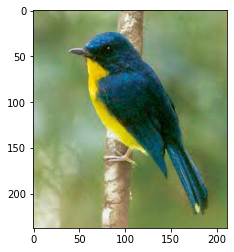

In [24]:
img1 = image.load_img("/Users/Pratyusha/OneDrive/Desktop/Summer22-Hw #04-BirdsDataset/test-birds/testing/01.jpg")
plt.imshow(img1)
#predicting the class for test data

classes = model.predict(bird_d)
print(classes)

sum = 0
for i in classes[0]:
        sum = sum + i
print("")
print("Sum of all probabilities in a class",sum)

index = np.where(classes[0] == max(classes[0]))[0][0]
print("")
print(str(index) + " : in the class_names")
test_d.class_indices

In [25]:
checkpoint

In [26]:
projector

<module 'tensorboard.plugins.projector' from 'C:\\Users\\Pratyusha\\anaconda\\lib\\site-packages\\tensorboard\\plugins\\projector\\__init__.py'>

In [27]:
config

embeddings {
  tensor_name: "embedding/.ATTRIBUTES/VARIABLE_VALUE"
  metadata_path: "metadata_classes.tsv"
  sprite {
    image_path: "sprite_classes.png"
    single_image_dim: 200
    single_image_dim: 200
  }
}

In [28]:
features

<tf.Variable 'features:0' shape=(1160, 512) dtype=float32, numpy=
array([[  0.      , 656.7003  ,   0.      , ..., 321.3381  , 135.6725  ,
          0.      ],
       [  0.      , 523.063   ,   0.      , ..., 254.38173 , 408.24423 ,
        284.78983 ],
       [  0.      , 308.7602  ,   0.      , ..., 166.38567 , 204.92508 ,
         82.20806 ],
       ...,
       [  0.      , 151.42921 ,   0.      , ..., 115.72589 , 229.92302 ,
        105.008224],
       [  0.      , 410.4935  , 141.60411 , ..., 178.53806 , 227.35603 ,
         27.907532],
       [  0.      , 180.02023 ,  45.56375 , ..., 112.15206 ,  98.63039 ,
         29.815321]], dtype=float32)>

In [29]:
metadata_filename

'metadata_classes.tsv'

In [30]:
log_dir_embed

'logs/embedding_logs'

In [35]:
%tensorboard --logdir logs/checkpoint --port=6006